## Black Friday - Sales Analysis ##

An Quick Exploratory Data Analysis (EDA) with Black Friday sales report, shared in [Kaggle](https://www.kaggle.com/mehdidag/black-friday).

With this data, I will try to answer the following Questions
1. What are maximum products sold
2. Finding the buyer's age group and their product of intreset
3. Finding the marital status of the buyers
4. predict marital status based on the data

> *#1 Quick Insights about the* **EDA**
>
> What is Exploratory Data Analysis?
> Exploratory analysis is done when you are searching for insights from  the data using the plots. 
> More details refer the [here](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#load the dataset
df = pd.read_csv("./Data/BlackFriday.csv")

In [3]:
df.shape

(537577, 12)

**This data set consist of 537577 rows(observations) with 12 columns (features)**

In [4]:
#Description of the data sets
df.describe()

User_ID    Occupation  Marital_Status  Product_Category_1  \
count  5.375770e+05  537577.00000   537577.000000       537577.000000   
mean   1.002992e+06       8.08271        0.408797            5.295546   
std    1.714393e+03       6.52412        0.491612            3.750701   
min    1.000001e+06       0.00000        0.000000            1.000000   
25%    1.001495e+06       2.00000        0.000000            1.000000   
50%    1.003031e+06       7.00000        0.000000            5.000000   
75%    1.004417e+06      14.00000        1.000000            8.000000   
max    1.006040e+06      20.00000        1.000000           18.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       370591.000000       164278.000000  537577.000000  
mean             9.842144           12.669840    9333.859853  
std              5.087259            4.124341    4981.022133  
min              2.000000            3.000000     185.000000  
25%              5.000000            9.000000    5866.000000  
50%              9.000000           14.000000    8062.000000  
75%             15.000000           16.000000   12073.000000  
max             18.000000           18.000000   23961.000000

In [5]:
#View first few records
df.head(n=10)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   
5                          3               0                   1   
6                          2               1                   1   
7                          2               1                   1   
8                          2               1                   1   
9                          1               1                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969  
5                 2.0                 NaN     15227  
6                 8.0                17.0     19215  
7                15.0                 NaN     15854  
8                16.0                 NaN     15686  
9                 NaN                 NaN      7871

In [6]:
#view last few records
df.tail()

User_ID Product_ID Gender    Age  Occupation City_Category  \
537572  1004737  P00193542      M  36-45          16             C   
537573  1004737  P00111142      M  36-45          16             C   
537574  1004737  P00345942      M  36-45          16             C   
537575  1004737  P00285842      M  36-45          16             C   
537576  1004737  P00118242      M  36-45          16             C   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
537572                          1               0                   1   
537573                          1               0                   1   
537574                          1               0                   8   
537575                          1               0                   5   
537576                          1               0                   5   

        Product_Category_2  Product_Category_3  Purchase  
537572                 2.0                 NaN     11664  
537573                15.0                16.0     19196  
537574                15.0                 NaN      8043  
537575                 NaN                 NaN      7172  
537576                 8.0                 NaN      6875

In [7]:
#Look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


**We are able to find three different datatypes as**
- 2 columns with float64
- 5 columns with int64
- 5 columns with object 

*Gender* & *City_Category* are categorical (Nominal) variables,
*Age* column has values in grouped manner.
we need to preprocess them, which we can see in the later section



> *#2 Quick Insights on the* **data types** 
>
> The Data types are classified into two as **Quantitative** and **Categorical**
> **Quantitative** data takes on numeric values that allow us to perform mathematical operations (like the number of dogs).
> **Categorical** are used to label a group or set of items (like dog breeds - Collies, Labs, Poodles, etc.).
>
> Categorical Ordinal vs. Categorical Nominal
> We can divide **categorical** data further into two types: **Ordinal** and **Nominal**.
> **Categorical Ordinal** data take on a ranked ordering (like a ranked interaction on a scale from Very Poor to Very Good with the dogs).
> **Categorical Nominal** data do not have an order or ranking (like the breeds of the dog).
>
> **Continuous** vs. **Discrete**
> We can think of **quantitative** data as being either **continuous** or **discrete**.
>Continuous data can be split into smaller and smaller units, and still a smaller unit exists. An example of this is the age of the dog - we can measure the units of the age in years, months, days, hours, seconds, but there are still smaller units that could be associated with the age.
>Discrete data only takes on countable values. The number of dogs we interact with is an example of a discrete data type.
>
>More details refer [wiki](https://en.wikipedia.org/wiki/Level_of_measurement) and a very good [Medium](https://towardsdatascience.com/data-types-in-statistics-347e152e8bee) post.




## Data Analysis##

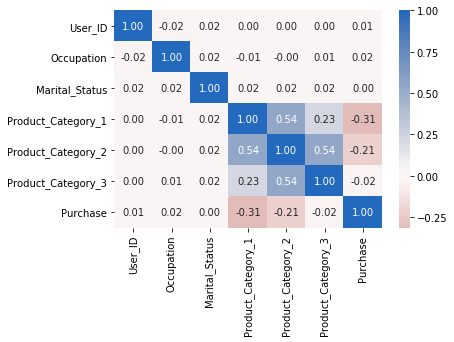

In [8]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

Product_Category_1, Product_Category_2 & Product_Category_3 correlation vale >.5 which is moderate. 

In [9]:
#Insights on NaN values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

we are able to see more null values in Product_Category_2 and Product_Category_3

In [10]:
df["Product_Category_1"].value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

In [11]:
df["Product_Category_2"].value_counts()

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: Product_Category_2, dtype: int64

In [12]:
df["Product_Category_3"].value_counts()

16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
8.0     12384
9.0     11414
12.0     9094
13.0     5385
6.0      4818
18.0     4563
4.0      1840
11.0     1773
10.0     1698
3.0       600
Name: Product_Category_3, dtype: int64

In [13]:
# See products in all 3 category
#df[df[["Product_ID","Product_Category_1","Product_Category_2","Product_Category_3"]].notnull()]
df_copy = df


In [14]:
df_copy.dropna()

User_ID Product_ID Gender    Age  Occupation City_Category  \
1       1000001  P00248942      F   0-17          10             A   
6       1000004  P00184942      M  46-50           7             B   
13      1000005  P00145042      M  26-35          20             A   
14      1000006  P00231342      F  51-55           9             A   
16      1000006   P0096642      F  51-55           9             A   
18      1000007  P00036842      M  36-45           1             B   
19      1000008  P00249542      M  26-35          12             C   
24      1000008  P00303442      M  26-35          12             C   
28      1000009  P00078742      M  26-35          17             C   
29      1000010  P00085942      F  36-45           1             B   
36      1000010  P00182642      F  36-45           1             B   
38      1000010  P00155442      F  36-45           1             B   
39      1000010  P00221342      F  36-45           1             B   
41      1000010  P00111142      F  36-45           1             B   
43      1000010   P0094542      F  36-45           1             B   
44      1000010  P00148642      F  36-45           1             B   
46      1000010  P00113242      F  36-45           1             B   
48      1000011  P00110842      F  26-35           1             C   
54      1000013  P00182342      M  46-50           1             C   
64      1000015  P00042142      M  26-35           7             A   
65      1000016  P00244242      F  36-45           0             C   
67      1000017  P00019342      M  51-55           1             C   
69      1000017  P00073842      M  51-55           1             C   
71      1000018  P00190742      F  18-25           3             B   
72      1000018  P00151842      F  18-25           3             B   
73      1000018  P00112642      F  18-25           3             B   
75      1000018  P00034442      F  18-25           3             B   
76      1000018  P00222242      F  18-25           3             B   
77      1000018  P00118342      F  18-25           3             B   
78      1000018  P00324742      F  18-25           3             B   
...         ...        ...    ...    ...         ...           ...   
537489  1004728  P00324742      M  26-35          19             B   
537490  1004728  P00034442      M  26-35          19             B   
537495  1004728   P0096742      M  26-35          19             B   
537498  1004728  P00122442      M  26-35          19             B   
537499  1004728  P00351142      M  26-35          19             B   
537507  1004728  P00016342      M  26-35          19             B   
537508  1004728  P00214642      M  26-35          19             B   
537510  1004729  P00070042      M  51-55          16             C   
537515  1004731  P00034042      M  26-35          17             B   
537516  1004731  P00221442      M  26-35          17             B   
537517  1004732  P00202142      M  26-35          14             B   
537519  1004732  P00345842      M  26-35          14             B   
537520  1004732  P00329542      M  26-35          14             B   
537521  1004732  P00235842      M  26-35          14             B   
537523  1004732  P00324442      M  26-35          14             B   
537526  1004732  P00122442      M  26-35          14             B   
537528  1004732  P00217542      M  26-35          14             B   
537529  1004732  P00184942      M  26-35          14             B   
537531  1004732  P00216242      M  26-35          14             B   
537539  1004732  P00113842      M  26-35          14             B   
537542  1004732  P00085242      M  26-35          14             B   
537544  1004732  P00093342      M  26-35          14             B   
537545  1004733  P00144042      M  18-25          18             C   
537546  1004733  P00070042      M  18-25          18             C   
537547  1004733  P00244042      M  18-25          18             C   
537549  1004734  P

In [15]:
df_copy[["Product_ID","Product_Category_1","Product_Category_2","Product_Category_3"]].dropna()

Product_ID  Product_Category_1  Product_Category_2  Product_Category_3
1       P00248942                   1                 6.0                14.0
6       P00184942                   1                 8.0                17.0
13      P00145042                   1                 2.0                 5.0
14      P00231342                   5                 8.0                14.0
16       P0096642                   2                 3.0                 4.0
18      P00036842                   1                14.0                16.0
19      P00249542                   1                 5.0                15.0
24      P00303442                   1                 8.0                14.0
28      P00078742                   5                 8.0                14.0
29      P00085942                   2                 4.0                 8.0
36      P00182642                   2                 4.0                 9.0
38      P00155442                   1                11.0                15.0
39      P00221342                   1                 2.0                 5.0
41      P00111142                   1                15.0                16.0
43       P0094542                   2                 4.0                 9.0
44      P00148642                   6                10.0                13.0
46      P00113242                   1                 6.0                 8.0
48      P00110842                   1                 2.0                 5.0
54      P00182342                   1                 5.0                 6.0
64      P00042142                   1                 2.0                 6.0
65      P00244242                   1                 2.0                15.0
67      P00019342                   1                 6.0                15.0
69      P00073842                   1                15.0                17.0
71      P00190742                   3                 4.0                 9.0
72      P00151842                   4                 8.0                 9.0
73      P00112642                   1                 2.0                 5.0
75      P00034442                   1                14.0                16.0
76      P00222242                   1                 2.0                13.0
77      P00118342                   2                 3.0                15.0
78      P00324742                   2                 9.0                14.0
...           ...                 ...                 ...                 ...
537489  P00324742                   2                 9.0                14.0
537490  P00034442                   1                14.0                16.0
537495   P0096742                   2                 4.0                12.0
537498  P00122442                   1                11.0                15.0
537499  P00351142                   1                 8.0                17.0
537507  P00016342                   1                 2.0                 8.0
537508  P00214642                  11                13.0                16.0
537510  P00070042                   1                 2.0                16.0
537515  P00034042                   1                 2.0                16.0
537516  P00221442                   1                 2.0                 5.0
537517  P00202142                   8                16.0                17.0
537519  P00345842                   2                 8.0                14.0
537520  P00329542                   1                15.0                16.0
537521  P00235842                  11                15.0                16.0
537523  P00324442                  11                13.0                16.0
537526  P00122442                   1                11.0                15.0
537528  P00217542                   1                 2.0                11.0
537529  P00184942                   1                 8.0                17.0
537531  P00216242                   3                 4.0                 5.0
537539  P00113842            

In [16]:
print("Shape of the original data set : {}".format(df.shape))
print("Shape of the NaN removed data set : {}".format(df_copy.dropna().shape))

Shape of the original data set : (537577, 12)
Shape of the NaN removed data set : (164278, 12)


In [17]:
#df_copy.dropna().shape[0]/df_copy.shape[0]
print ("Propotion of missing values in df :{0:.2f}".format((df_copy.shape[0] - df_copy.dropna().shape[0])/df_copy.shape[0]))


Propotion of missing values in df :0.69


**Removing the NaN values is resulting in loss of 70% data in the data set**. This results in *bias-ed* model causing the model to be underfit.

The available alternate approaches are imputing the missing values with mean, mode or fill with 0. 
since the Product_Catgeory_2 & Product_Catgeory_3 coulmns are interlinked with values present in Product_Catgeory_1, hence imputing with mean/mode is not a good strategy, hence we will fill the Nan values with 0.

In [18]:
#Fill na with Zero
df.fillna(0, inplace=True)

In [19]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [20]:
df[["Product_ID","Product_Category_1","Product_Category_2","Product_Category_3"]].head(n=20)

Product_ID  Product_Category_1  Product_Category_2  Product_Category_3
0   P00069042                   3                 0.0                 0.0
1   P00248942                   1                 6.0                14.0
2   P00087842                  12                 0.0                 0.0
3   P00085442                  12                14.0                 0.0
4   P00285442                   8                 0.0                 0.0
5   P00193542                   1                 2.0                 0.0
6   P00184942                   1                 8.0                17.0
7   P00346142                   1                15.0                 0.0
8    P0097242                   1                16.0                 0.0
9   P00274942                   8                 0.0                 0.0
10  P00251242                   5                11.0                 0.0
11  P00014542                   8                 0.0                 0.0
12  P00031342                   8                 0.0                 0.0
13  P00145042                   1                 2.0                 5.0
14  P00231342                   5                 8.0                14.0
15  P00190242                   4                 5.0                 0.0
16   P0096642                   2                 3.0                 4.0
17  P00058442                   5                14.0                 0.0
18  P00036842                   1                14.0                16.0
19  P00249542                   1                 5.0                15.0

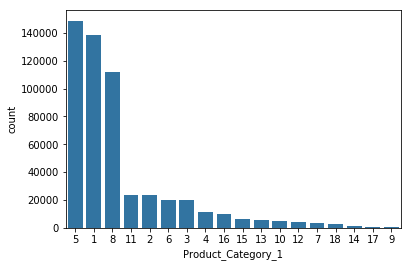

In [21]:
#plot values counts of product_category_1
base_color = sns.color_palette()[0]
#value count give ths count of  the values in the col
cat_order = df['Product_Category_1'].value_counts().index
sns.countplot(data = df, x = 'Product_Category_1', color = base_color, order = cat_order)


Lets see the top 10 products sold

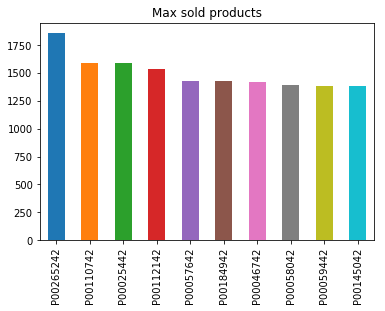

In [22]:
#Top 10 Products sold 
df.Product_ID.value_counts()[:10].plot("bar", title = "Max sold products")

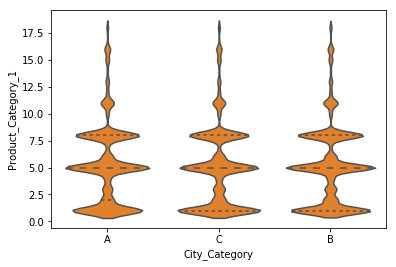

In [27]:
sns.violinplot(data = df, x = 'City_Category', y = 'Product_Category_1', inner= 'quartile', color=sns.color_palette()[1])


In [28]:
df.Age.value_counts()


26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

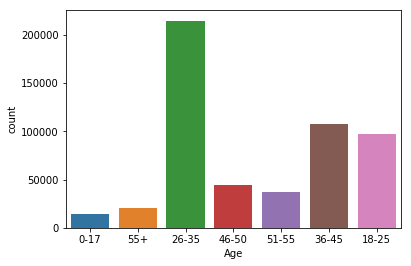

In [31]:
sns.countplot(df['Age'])

The Majority of users are from age group of 26-35
Further, I could also check among the age groups, which gender was a majority by adding a hue. And as seen below, more males spent in the sale than females.

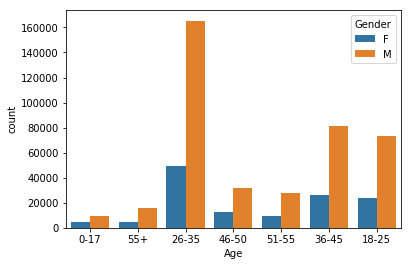

In [34]:
sns.countplot(df['Age'], hue=df['Gender'])

In [35]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


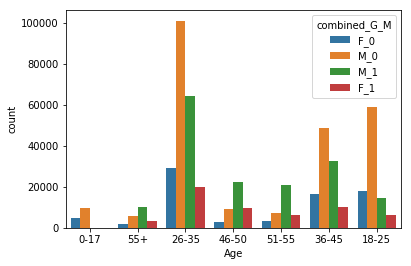

In [36]:
sns.countplot(df['Age'], hue=df['combined_G_M'])

As we see above, there are no bars for the married in the 0-17 range which makes sense. 
And then if we look at the 46 and above groups, females are very less. But on the other hand, married males paying in range 46-55 are also comparatively more than married females. So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more. If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. However, since in this dataset we don't know if there is a category that implies feminine products/clothes we cannot further explore this case.

In [ ]:
#Prepare the data model to predict the martial status
#drop the user id & product_id and combined _g_m
#convert the age group as one-hot code and geneder and 
#take martial status as y

